# Problem 2

Use file *“macros2.xlsx”* this exercise. The brief description of the variables are given in the table below. The dataset has a time-series structure

__macros2.xlsx__

| Column   | Type    | Description                                  |
|:---------|:--------|:---------------------------------------------|
| `Period` | Date    | Observation date in YYYYQQ format (Year Quarter) |
| `HPI_S0` | Numeric | HPI under S0 Scenario forecast              |
| `HPI_S1` | Numeric | HPI under S1 Scenario forecast              |
| `HPI_S3` | Numeric | HPI under S3 Scenario forecast              |
| `HPI_S4` | Numeric | HPI under S4 Scenario forecast              |
| `LBR_S0` | Numeric | Unemployment Rate under S0 Scenario         |
| `LBR_S1` | Numeric | Unemployment Rate under S1 Scenario         |
| `LBR_S3` | Numeric | Unemployment Rate under S3 Scenario         |
| `LBR_S4` | Numeric | Unemployment Rate under S4 Scenario         |


1. __Transform the data in a way to have 4 columns corresponding to date variable, values for HPI and unemployment rate (in one column), variable category (either HPI or LBR) and scenario name (e.g. S0, S1, etc.), as shown below.__

| Date | Value | Category | Scenario |
|:---|:---:|:---:|:---: |
| 2010Q1 | 150 | HPI | S0 |
| 2010Q1 | 152 | HPI | S1 |
| 2010Q1 | 145 | HPI | S3 |
| 2010Q1 | 130 | HPI | S4 |
| 2010Q1 | 2.15 | LBR | S0 |

In [1]:
import pandas as pd

df = pd.read_excel('macros2.xlsx')
df.head()

,Period,HPI_S0,HPI_S1,HPI_S3,HPI_S4,LBR_S0,LBR_S1,LBR_S3,LBR_S4
0,1990Q1,34.631332,34.631332,34.631332,34.631332,6.9,6.9,6.9,6.9
1,1990Q2,34.373422,34.373422,34.373422,34.373422,6.9,6.9,6.9,6.9
2,1990Q3,34.111672,34.111672,34.111672,34.111672,7.1,7.1,7.1,7.1
3,1990Q4,33.933712,33.933712,33.933712,33.933712,7.5,7.5,7.5,7.5
4,1991Q1,33.914461,33.914461,33.914461,33.914461,8.0,8.0,8.0,8.0


In [5]:
# Create a list of relevant columns
columns_to_melt = ['Period', 'HPI_S0', 'HPI_S1', 'HPI_S3', 'HPI_S4', 'LBR_S0', 'LBR_S1', 'LBR_S3', 'LBR_S4']

# Initialize an empty list to store the melted data
melted_data = []

# Iterate through each row in the dataframe
for index, row in df.iterrows():
    period = row['Period']
    for col in columns_to_melt[1:]:  # Skip 'Period' column
        category, scenario = col.split('_')
        value = row[col]
        melted_data.append([period, value, category, scenario])
melted_data

[['1990Q1', 34.63133227687876, 'HPI', 'S0'],
 ['1990Q1', 34.63133227687876, 'HPI', 'S1'],
 ['1990Q1', 34.63133227687876, 'HPI', 'S3'],
 ['1990Q1', 34.63133227687876, 'HPI', 'S4'],
 ['1990Q1', 6.9, 'LBR', 'S0'],
 ['1990Q1', 6.9, 'LBR', 'S1'],
 ['1990Q1', 6.9, 'LBR', 'S3'],
 ['1990Q1', 6.9, 'LBR', 'S4'],
 ['1990Q2', 34.373421685244026, 'HPI', 'S0'],
 ['1990Q2', 34.373421685244026, 'HPI', 'S1'],
 ['1990Q2', 34.373421685244026, 'HPI', 'S3'],
 ['1990Q2', 34.373421685244026, 'HPI', 'S4'],
 ['1990Q2', 6.9, 'LBR', 'S0'],
 ['1990Q2', 6.9, 'LBR', 'S1'],
 ['1990Q2', 6.9, 'LBR', 'S3'],
 ['1990Q2', 6.9, 'LBR', 'S4'],
 ['1990Q3', 34.11167158457823, 'HPI', 'S0'],
 ['1990Q3', 34.11167158457823, 'HPI', 'S1'],
 ['1990Q3', 34.11167158457823, 'HPI', 'S3'],
 ['1990Q3', 34.11167158457823, 'HPI', 'S4'],
 ['1990Q3', 7.1, 'LBR', 'S0'],
 ['1990Q3', 7.1, 'LBR', 'S1'],
 ['1990Q3', 7.1, 'LBR', 'S3'],
 ['1990Q3', 7.1, 'LBR', 'S4'],
 ['1990Q4', 33.93371178947115, 'HPI', 'S0'],
 ['1990Q4', 33.93371178947115, 'HPI', '

In [6]:
# Create a new dataframe from the melted data
df_melted = pd.DataFrame(melted_data, columns=['Period', 'Value', 'Category', 'Scenario'])
        
# Drop the index column
df_melted = df_melted.rename(columns={"Period": "Date"})

df_melted

,Date,Value,Category,Scenario
0,1990Q1,34.631332,HPI,S0
1,1990Q1,34.631332,HPI,S1
2,1990Q1,34.631332,HPI,S3
3,1990Q1,34.631332,HPI,S4
4,1990Q1,6.900000,LBR,S0
...,...,...,...,...
1947,2050Q4,352.266364,HPI,S4
1948,2050Q4,4.966112,LBR,S0
1949,2050Q4,4.949750,LBR,S1
1950,2050Q4,4.993687,LBR,S3


2. __Based on data obtained in question 1, transform the data in a way to obtain 4 columns, but now with the following variables, date variable, HPI values, Unemployment values and scenario name (e.g. S0, S1, etc.), as shown below.__

| Date | HPI | Unemployment | Scenario |
| :---|:---:|:---:|:---: |
| 2010Q1 | 150 | 2.15 | S0 |
| 2010Q1 | 155 | 2.10 | S1 |
| 2010Q1 | 145 | 2.5 | S3 |
| 2010Q1 | 130 | 3 | S4 |
| 2010Q2 | 152 | 2.14 | S0 |

In [ ]:
# Initialize an empty list to store the transformed data
transformed_data = []

# Iterate through each row in the dataframe
for index, row in df_xlsx.iterrows():
    period = row['Period']
    for col in columns_to_melt[1:]:  # Skip 'Period' column
        scenario = col.split('_')[1]  # Extract scenario
        hpi_value = row[col]  # Extract HPI value
        unemployment_column = f"LBR_{scenario}"  # Corresponding Unemployment column
        unemployment_value = row[unemployment_column]  # Extract Unemployment value
        transformed_data.append([period, hpi_value, unemployment_value, scenario])

# Create a new dataframe from the transformed data
df_transformed = pd.DataFrame(transformed_data, columns=['Date', 'HPI', 'Unemployment', 'Scenario'])

# Print the final dataframe
df_transformed

3. __Create 2 graphs, one for HPI and one for unemployment, over time and showing all 4 scenarios.__ 

Additionally, determine the date when the actual historical data ends and forecast starts (point when the series diverge across different scenarios). Which scenario implies severe economic conditions based on the forecast?

In [305]:
df_2['Date'] = df_2['Date'].str.replace('Q', '-Q')
df_2

,Date,HPI,Unemployment,Scenario
0,1990-Q1,34.631332,6.900000,S0
1,1990-Q1,34.631332,6.900000,S1
2,1990-Q1,34.631332,6.900000,S3
3,1990-Q1,34.631332,6.900000,S4
4,1990-Q2,34.373422,6.900000,S0
...,...,...,...,...
971,2050-Q3,348.935831,4.996122,S4
972,2050-Q4,439.441767,4.966112,S0
973,2050-Q4,422.103713,4.949750,S1
974,2050-Q4,364.881431,4.993687,S3


In [306]:
df_2['Date'] = pd.to_datetime(df_2['Date'])
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          976 non-null    datetime64[ns]
 1   HPI           976 non-null    float64       
 2   Unemployment  976 non-null    float64       
 3   Scenario      976 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 30.6+ KB


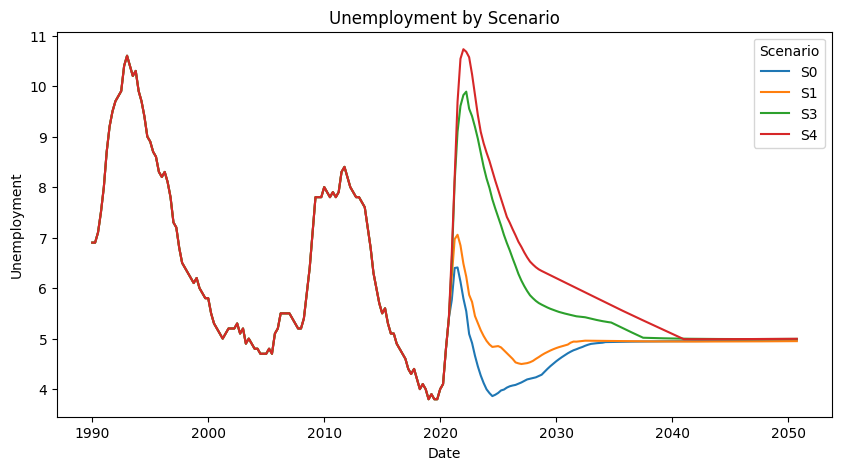

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5))

# Group by Scenario as the Y axis
sns.lineplot(x='Date', y='Unemployment', hue='Scenario', data=df_2, ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment')
ax.set_title('Unemployment by Scenario')

plt.show()

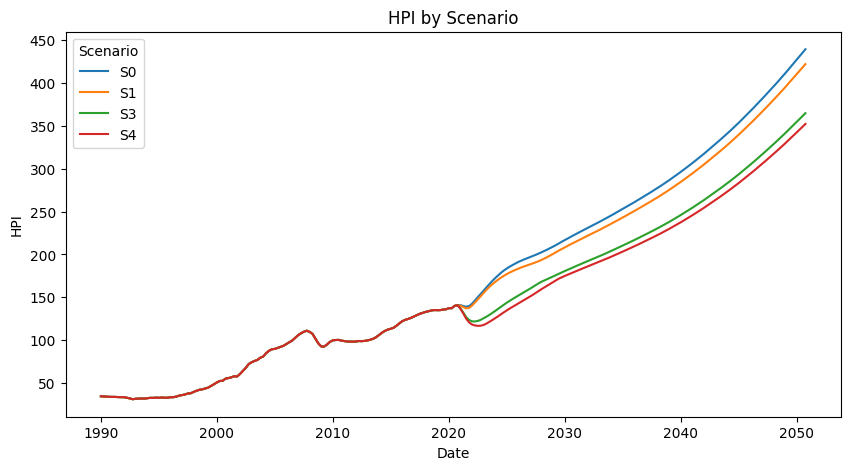

In [311]:
fig, ax = plt.subplots(figsize=(10, 5))

# Group by Scenario as the Y axis
sns.lineplot(x='Date', y='HPI', hue='Scenario', data=df_2, ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('HPI')
ax.set_title('HPI by Scenario')

plt.show()

__Answer part 3:__

- The forecast starts somewhere around 2020
- Scenario S0 and S4 are the border scenarios, however since S4 is directly derived from the actual historical data, S0 will be the one that implies the most severe economic conditions